# Guided Project: Exploring Ebay Car Sales Data

In [35]:
import pandas as pd
import numpy as np

try:
    autos = pd.read_csv('autos.csv',encoding='Latin-1')
except:
    autos = pd.read_csv('autos.csv',encoding='Windows-1252')


In [36]:
autos.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08


In [37]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

## Cleaning Columns Names

In [38]:
for col in autos.columns:
    print(col)

dateCrawled
name
seller
offerType
price
abtest
vehicleType
yearOfRegistration
gearbox
powerPS
model
odometer
monthOfRegistration
fuelType
brand
notRepairedDamage
dateCreated
nrOfPictures
postalCode
lastSeen


In [39]:
column_name = {
    'yearOfRegistration': 'registration_year',
    'monthOfRegistration':'registration_month',
    'notRepairedDamage': 'unrepaired_damage', 
    'dateCreated': 'ad_created'
}

In [40]:
autos.rename(column_name,axis=1,inplace=True)

In [41]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled           50000 non-null object
name                  50000 non-null object
seller                50000 non-null object
offerType             50000 non-null object
price                 50000 non-null object
abtest                50000 non-null object
vehicleType           44905 non-null object
registration_year     50000 non-null int64
gearbox               47320 non-null object
powerPS               50000 non-null int64
model                 47242 non-null object
odometer              50000 non-null object
registration_month    50000 non-null int64
fuelType              45518 non-null object
brand                 50000 non-null object
unrepaired_damage     40171 non-null object
ad_created            50000 non-null object
nrOfPictures          50000 non-null int64
postalCode            50000 non-null int64
lastSeen              50000 non-null object
dtypes: int64(5)

## Initial Exploration and Cleaning

In [42]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-11 22:38:16,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [43]:
autos.price.unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [44]:
autos.price = (autos.price
                           .str.replace('$','')
                           .str.replace('.','')
                           .str.replace(',','')
                           .astype(float))


In [45]:
autos.odometer.value_counts()

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

In [46]:
autos.odometer = (autos.odometer.str.replace('km','')
                                .str.replace(',','')
                                .astype(int))

autos.odometer.value_counts()


150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer, dtype: int64

In [47]:
autos.rename({'odometer':'odometer_km'},axis=1,inplace=True)

## Exploring the Odometer and Price Columns

In [48]:
autos.odometer_km.value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [49]:
autos.price.value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

In [50]:
autos.loc[autos.price>350000.0,'price']=np.nan

In [51]:
autos.price.value_counts().sort_index(ascending=False).tail(100)

329.0       2
325.0       5
320.0      12
310.0       1
300.0     384
299.0      56
295.0       1
290.0      19
285.0       1
280.0      30
277.0       1
275.0       7
270.0       6
269.0       1
260.0       5
255.0       1
251.0       1
250.0     291
249.0      13
248.0       1
240.0       3
238.0       1
235.0       2
230.0      12
225.0       8
222.0      12
220.0      33
219.0       1
217.0       1
215.0       2
         ... 
66.0        1
65.0        5
60.0        9
59.0        1
55.0        2
50.0       49
49.0        4
47.0        1
45.0        4
40.0        6
35.0        1
30.0        7
29.0        1
25.0        5
20.0        4
18.0        1
17.0        3
15.0        2
14.0        1
13.0        2
12.0        3
11.0        2
10.0        7
9.0         1
8.0         1
5.0         2
3.0         1
2.0         3
1.0       156
0.0      1421
Name: price, Length: 100, dtype: int64

In [52]:
autos.loc[autos.price<50.0,'price']=np.nan

In [53]:
autos.shape

(50000, 20)

In [56]:
autos.dropna(subset=['price'],inplace=True)
#autos.dropna(axis=0,inplace=True)
autos.shape

(48347, 20)

## Exploring the date columns

In [62]:
cols = ['dateCrawled', 'ad_created', 'lastSeen']

In [63]:
for col in cols:
    print('---'*15)
    print(col)
    print('---'*15)
    print(autos[col].value_counts(normalize=True,
                                  dropna=False)
                    .sort_index()
                    .head(5))
    
    print(autos[col].value_counts(normalize=True,
                                  dropna=False)
                    .sort_index()
                    .tail(5))
    

---------------------------------------------
dateCrawled
---------------------------------------------
2016-03-05 14:06:30    0.000021
2016-03-05 14:06:40    0.000021
2016-03-05 14:07:04    0.000021
2016-03-05 14:07:08    0.000021
2016-03-05 14:07:21    0.000021
Name: dateCrawled, dtype: float64
2016-04-07 14:30:09    0.000021
2016-04-07 14:30:26    0.000021
2016-04-07 14:36:44    0.000021
2016-04-07 14:36:55    0.000021
2016-04-07 14:36:56    0.000021
Name: dateCrawled, dtype: float64
---------------------------------------------
ad_created
---------------------------------------------
2015-06-11 00:00:00    0.000021
2015-08-10 00:00:00    0.000021
2015-09-09 00:00:00    0.000021
2015-11-10 00:00:00    0.000021
2015-12-05 00:00:00    0.000021
Name: ad_created, dtype: float64
2016-04-03 00:00:00    0.038824
2016-04-04 00:00:00    0.036900
2016-04-05 00:00:00    0.011769
2016-04-06 00:00:00    0.003247
2016-04-07 00:00:00    0.001241
Name: ad_created, dtype: float64
-------------------

In [65]:
autos.registration_year.describe()

count    48347.000000
mean      2004.718845
std         87.786604
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## Dealing with incorrect registration year data

In [76]:
conditions = ((autos.registration_year >2016)
              |(autos.registration_year <1920))

print(autos.loc[conditions,'registration_year'].value_counts()
                                               .sort_index())

1000       1
1001       1
1111       1
1800       2
1910       2
2017    1385
2018     468
2019       2
2800       1
4100       1
4500       1
4800       1
5000       3
5911       1
6200       1
8888       1
9000       1
9999       3
Name: registration_year, dtype: int64


In [78]:
autos.shape

(48347, 20)

In [79]:
autos.loc[conditions,'registration_year'] = np.nan
autos.dropna(subset=['registration_year'],inplace=True)

In [80]:
autos.shape

(46471, 20)

## Exploring price by brand

In [81]:
autos.brand.value_counts(normalize=True)

volkswagen        0.211336
bmw               0.109961
opel              0.107293
mercedes_benz     0.096512
audi              0.086613
ford              0.069979
renault           0.047169
peugeot           0.029911
fiat              0.025715
seat              0.018248
skoda             0.016419
nissan            0.015321
mazda             0.015257
smart             0.014181
citroen           0.014052
toyota            0.012761
hyundai           0.010049
sonstige_autos    0.009619
volvo             0.009102
mini              0.008780
mitsubishi        0.008177
honda             0.007854
kia               0.007101
alfa_romeo        0.006649
porsche           0.006047
suzuki            0.005939
chevrolet         0.005702
chrysler          0.003529
dacia             0.002647
daihatsu          0.002518
jeep              0.002281
land_rover        0.002109
subaru            0.002109
saab              0.001657
jaguar            0.001571
daewoo            0.001485
trabant           0.001377
r

In [85]:
brand_cars = autos.brand.value_counts(normalize=True)
branding = brand_cars.loc[brand_cars >0.01].index

In [87]:
branding_price = dict()

for brands in branding:
    condition = autos.brand == brands
    average_price = autos.loc[condition,'price'].mean()
    branding_price[brands]=average_price

print(branding_price)


{'hyundai': 5376.740899357602, 'volkswagen': 5424.9185419000105, 'bmw': 8376.805088062622, 'audi': 9373.771428571428, 'peugeot': 3100.6928057553955, 'renault': 2484.749087591241, 'ford': 3762.1165436654364, 'opel': 2996.585639791416, 'smart': 3591.0212443095597, 'nissan': 4750.063202247191, 'fiat': 2818.456066945607, 'mazda': 4112.596614950635, 'skoda': 6393.018348623853, 'toyota': 5167.091062394604, 'citroen': 3784.924961715161, 'seat': 4423.116745283019, 'mercedes_benz': 8663.059308807135}


## Storing Aggregate Data in a DataFrame

In [89]:
branding_mileage = dict()

for brands in branding:
    condition = autos.brand == brands
    average_odometer = autos.loc[condition,'odometer_km'].mean()
    branding_mileage[brands]=average_odometer

print(branding_mileage)


{'hyundai': 106541.75588865097, 'volkswagen': 128771.00091640363, 'bmw': 132651.66340508807, 'audi': 129254.65838509316, 'peugeot': 127122.30215827338, 'renault': 128200.27372262774, 'ford': 124295.81795817958, 'opel': 129436.42198154834, 'smart': 99590.28831562975, 'nissan': 118370.78651685393, 'fiat': 117066.94560669456, 'mazda': 124464.03385049365, 'skoda': 110884.66579292268, 'toyota': 115944.35075885328, 'citroen': 119647.77947932619, 'seat': 121303.06603773584, 'mercedes_benz': 130923.07692307692}


In [90]:
bmp_series = pd.Series(branding_mileage)

In [91]:
price_series = pd.Series(branding_price)

In [93]:
constructor = pd.DataFrame(bmp_series,columns=['mileage'])

In [94]:
constructor['price'] = price_series

In [96]:
constructor.sort_values(by='price',ascending=True)

,mileage,price
renault,128200.273723,2484.749088
fiat,117066.945607,2818.456067
opel,129436.421982,2996.585640
peugeot,127122.302158,3100.692806
smart,99590.288316,3591.021244
ford,124295.817958,3762.116544
citroen,119647.779479,3784.924962
mazda,124464.033850,4112.596615
seat,121303.066038,4423.116745
nissan,118370.786517,4750.063202


In [97]:
constructor.sort_values(by='price',ascending=False)

,mileage,price
audi,129254.658385,9373.771429
mercedes_benz,130923.076923,8663.059309
bmw,132651.663405,8376.805088
skoda,110884.665793,6393.018349
volkswagen,128771.000916,5424.918542
hyundai,106541.755889,5376.740899
toyota,115944.350759,5167.091062
nissan,118370.786517,4750.063202
seat,121303.066038,4423.116745
mazda,124464.033850,4112.596615


In [98]:
constructor.sort_values(by='mileage',ascending=False)

,mileage,price
bmw,132651.663405,8376.805088
mercedes_benz,130923.076923,8663.059309
opel,129436.421982,2996.585640
audi,129254.658385,9373.771429
volkswagen,128771.000916,5424.918542
renault,128200.273723,2484.749088
peugeot,127122.302158,3100.692806
mazda,124464.033850,4112.596615
ford,124295.817958,3762.116544
seat,121303.066038,4423.116745


## Bonus

In [99]:
autos.unrepaired_damage.unique()     

array(['nein', nan, 'ja'], dtype=object)

In [102]:
traductions = {
    'nein':'no',
    'ja':'yes',
    'no':'no',
    'yes':'yes'
}

autos.unrepaired_damage = autos.unrepaired_damage.map(traductions)


In [103]:
autos.unrepaired_damage.unique()

array(['no', nan, 'yes'], dtype=object)

In [105]:
autos.unrepaired_damage.value_counts(normalize=True,
                                     dropna=False)

no     0.727206
NaN    0.175593
yes    0.097200
Name: unrepaired_damage, dtype: float64

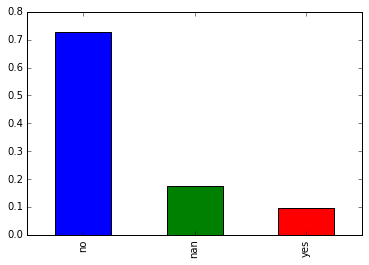

In [108]:
%matplotlib inline
(autos.unrepaired_damage.value_counts(normalize=True,
                                     dropna=False)
                        .plot.bar())
